In [2]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

* print top 5 rows of world data-frame

In [4]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [5]:
# continents with only one country
world.groupby(['continent']).count()

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,51,51,51,51,51
Antarctica,1,1,1,1,1
Asia,47,47,47,47,47
Europe,39,39,39,39,39
North America,18,18,18,18,18
Oceania,7,7,7,7,7
Seven seas (open ocean),1,1,1,1,1
South America,13,13,13,13,13


* remove continents which have only one country in data-frame


In [6]:
# continents with only one country
world.groupby(['continent']).count()

# remove these continents
world_dropped = world[(world.continent != 'Antarctica') & (world.continent != 'Seven seas (open ocean)')]
world_dropped

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


* create dataframe with top 3 most populated countries from each continent
* store the result in data-frame with name 'world_filtered'

In [7]:
world_filtered = world_dropped.sort_values(by=['continent', 'pop_est'], ascending = False)
world_filtered = world_filtered.groupby('continent').head(3) 

* print 'world_filtered' data-frame

In [8]:
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5..."
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.876 1.253, -67.065 1.130, -67.26..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.634 -52.636, -68.250 -53.1..."
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.689 -40.808, 148.289 -40.8..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.000 -2.600, 142.735 -3.289..."
136,4510327,Oceania,New Zealand,NZL,174800.0,"MULTIPOLYGON (((176.886 -40.066, 176.508 -40.6..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0..."
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.128 32.535, -115.991 32.612, -1..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0..."
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."


* create choropleth map of world
* the colors of countries from 'world_filtered' are based on population
* other countries are white with black edgecolor

<AxesSubplot:>

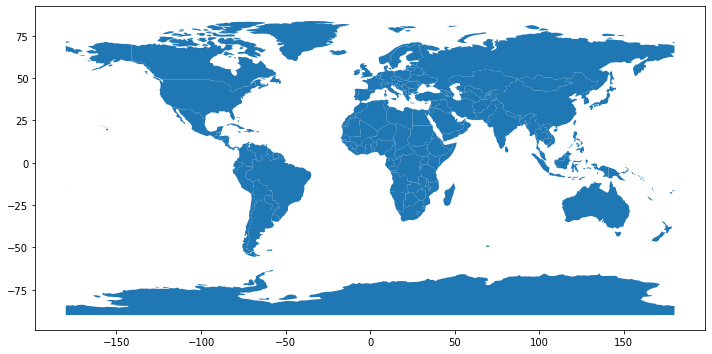

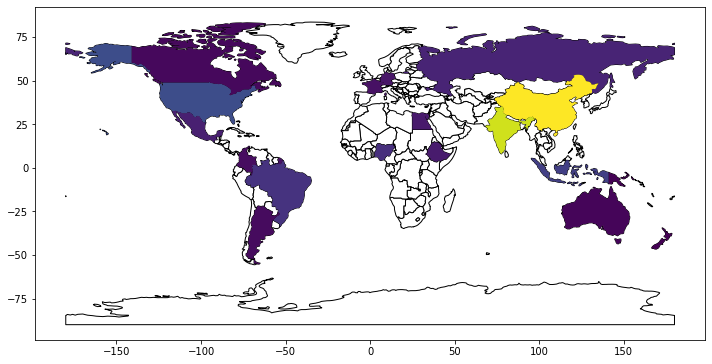

In [9]:
plt.rcParams["figure.figsize"] = (12,8)
# create figure and axes
world.plot()

# create map from world_filtered data-frame
base = world.plot(color='white', edgecolor='black')
world_filtered.plot(ax = base, column='pop_est')



* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
* to get geometry of these cities use gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
* if you do not have geopy library instaled, install it with the following command in the jupyter notebook cell
* !pip install geopy

In [42]:
# get geometry
cities = gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary'])

#cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
#city = cities[cities['name'].isin(['New', 'Berlin','Paris','Toronto','Calgary','Tokyo'])]
cities

GeocoderUnavailable: HTTPSConnectionPool(host='www.geocode.farm', port=443): Max retries exceeded with url: /v3/json/forward/?addr=New+York (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f112ad38970>, 'Connection to www.geocode.farm timed out. (connect timeout=1)'))

In [43]:
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


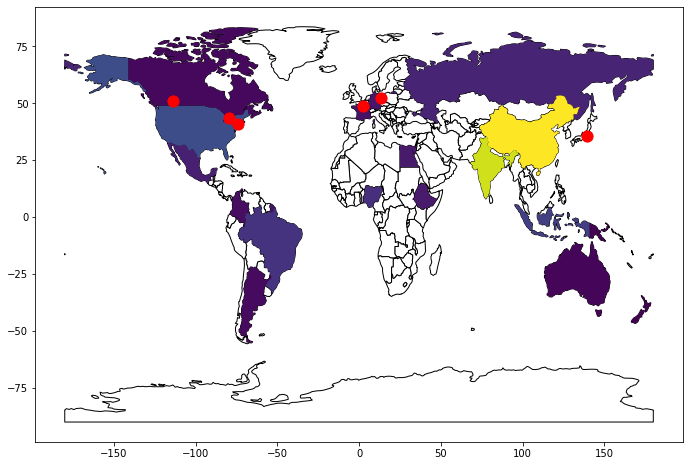

In [69]:
# create figure and axes
base = world.plot(color='white', edgecolor='black')
world_filtered.plot(ax = base, column='pop_est')
cities.plot(ax = base, marker='.', color='red', markersize=500);
